In [80]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
scaler = StandardScaler()

In [81]:
path = 'crypto_data/my_dataset_csv.csv'               

my_df = pd.read_csv(path)  
my_df = my_df.dropna()
my_df = my_df.drop('Datetime', 1)

In [82]:
my_df = pd.DataFrame(scaler.fit_transform(my_df),columns = my_df.columns)

In [83]:
my_df

,BTC-USD_close,LTC-USD_close,ETH-USD_close,BCH-USD_close
0,-0.963719,-1.049992,-0.941173,-1.119348
1,-0.963978,-1.053079,-0.938261,-1.117393
2,-0.963563,-1.038220,-0.938347,-1.118144
3,-0.962346,-1.054497,-0.932420,-1.114794
4,-0.963704,-1.056933,-0.932084,-1.125582
...,...,...,...,...
52640,2.264238,2.062300,2.705294,1.289100
52641,2.264185,2.062056,2.703796,1.288883
52642,2.263850,2.059199,2.706979,1.291297
52643,2.263865,2.059137,2.706985,1.291246


In [84]:
my_df[:5]

,BTC-USD_close,LTC-USD_close,ETH-USD_close,BCH-USD_close
0,-0.963719,-1.049992,-0.941173,-1.119348
1,-0.963978,-1.053079,-0.938261,-1.117393
2,-0.963563,-1.038220,-0.938347,-1.118144
3,-0.962346,-1.054497,-0.932420,-1.114794
4,-0.963704,-1.056933,-0.932084,-1.125582


In [85]:
def make_dataset_test(data):
    data = np.array(data, dtype=np.float32) # convert data to np.array
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=24,
      sequence_stride=1,
      shuffle=False,
      batch_size=1,)
    # very useful function which converts data to dataset (input_window, label_window) from array

    #ds = ds.map(split_window_test)

    return ds

In [86]:
my_gru_model = load_model("models_20_11_2020\\gru_model_bidi.model")
gru_model_single = load_model("models_20_11_2020\\gru_single.model")

In [95]:
def compare_models(model1, model2_single, points, window_size):
    
    predictions1 = []
    predictions2 = []
    
    for point in range(points):
        in_data = np.array(my_df[point: point+window_size])
        in_data = in_data[None, :, :]
        
        multi_prediction = model1.predict(in_data)
        
        predictions1.append(multi_prediction[0][23][0])
        predictions2.append(model2_single.predict(in_data))
    
    x_axis_predictions = np.arange(points)+window_size+1
    x_axis = np.arange(points+window_size)
    
    
    in_arr = np.array(my_df[:points+window_size])
    in_arr = in_arr[None, :, :]
    in_arr.shape
    actual_price = in_arr[0,:,0]
    
    
    
    plt.figure(figsize=(20,20))
    plt.plot(x_axis, actual_price,
                     label='Inputs', marker='.', zorder=-10)
    plt.scatter(x_axis,actual_price, edgecolors='k', label='Labels', c='#2ca02c', s=64)
    plt.scatter(x_axis_predictions,predictions1, marker='x', edgecolors='k', label='Predictions', c='#9467bd', s=64)
    plt.scatter(x_axis_predictions,predictions2, marker='+', edgecolors='k', label='Predictions', c='#bcbd22', s=64)
    plt.vlines(x=x_axis, ymin=-0.98, ymax=-0.84, colors='green', ls=':', lw=0.5)
    plt.show()
    

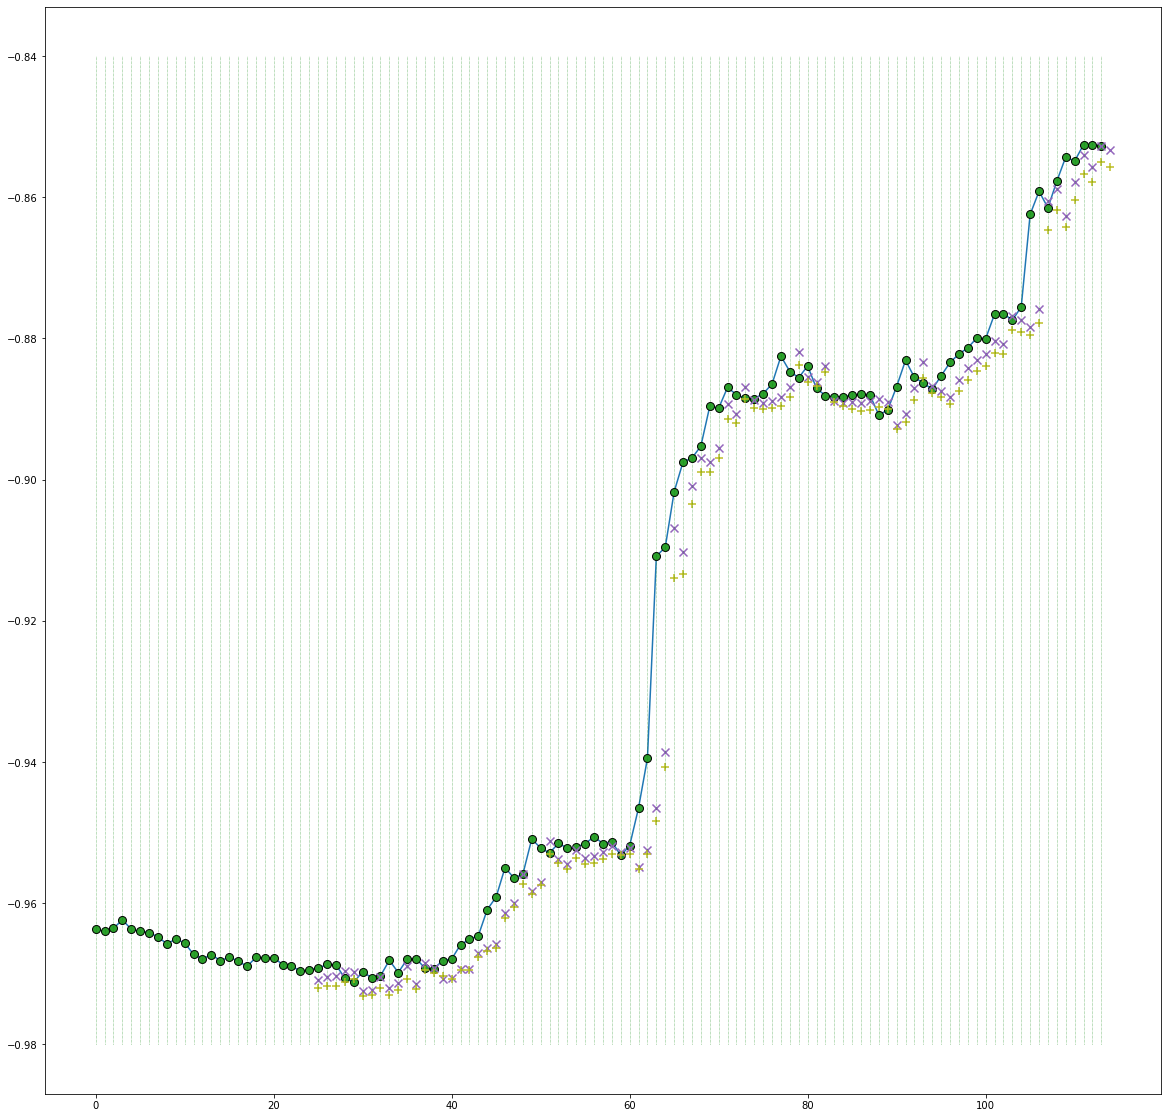

In [96]:
compare_models(my_gru_model, gru_model_single, 90, 24)